<a href="https://colab.research.google.com/github/Bin7amood/Assignment-/blob/main/Medical_Insurance_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the library

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

In [5]:
insurance_dataset = pd.read_csv('/content/insurance.csv')
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
insurance_dataset.shape

(1338, 7)

Get the Dataset information

In [7]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Check the Null Values

In [8]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [78]:
insurance_dataset = insurance_dataset.dropna()

In [79]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Description for each feature

<ipython-input-9-c0c418315878>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


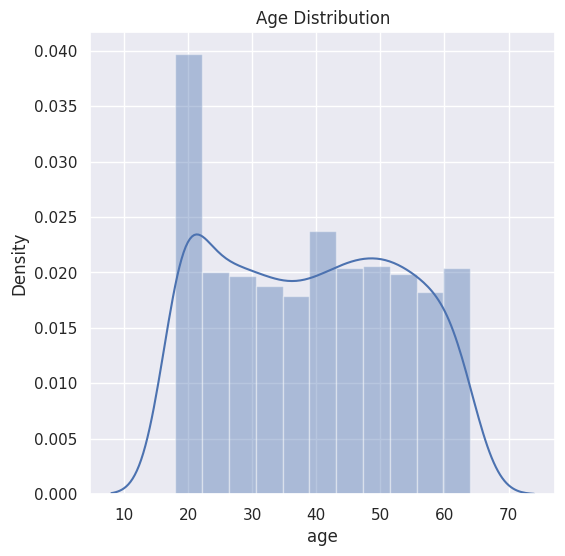

In [9]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

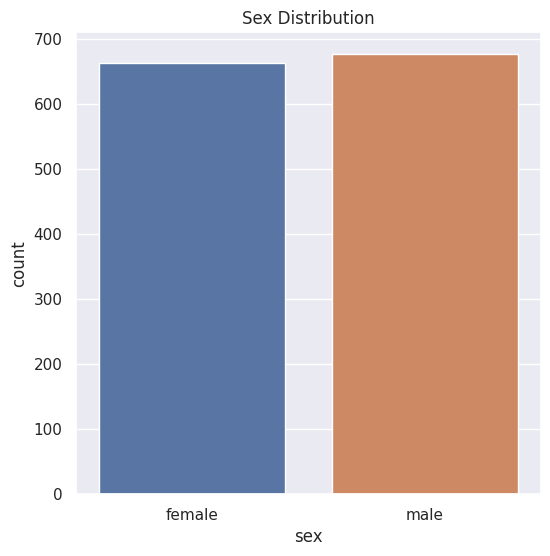

In [10]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [11]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<ipython-input-12-ec759afa6317>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


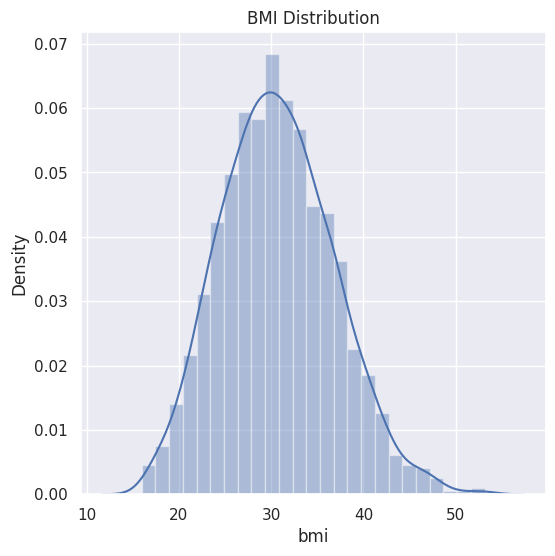

In [12]:
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

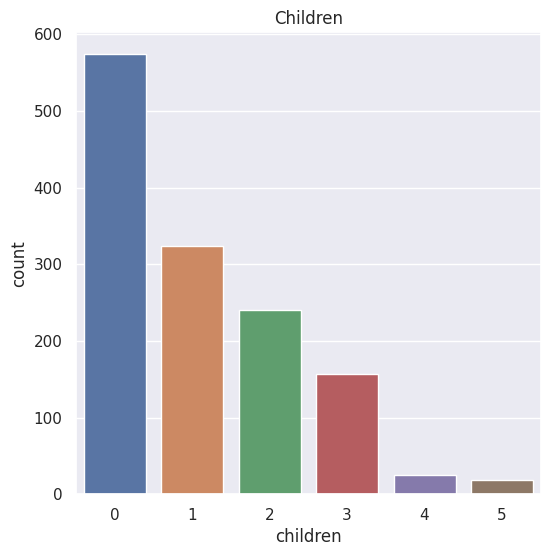

In [13]:
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

In [14]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

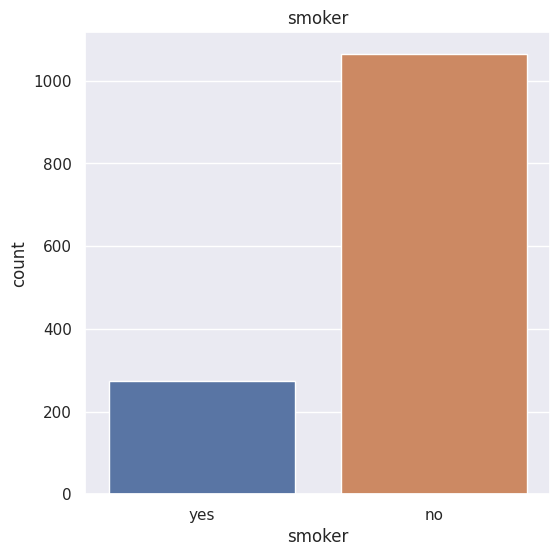

In [15]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

In [16]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

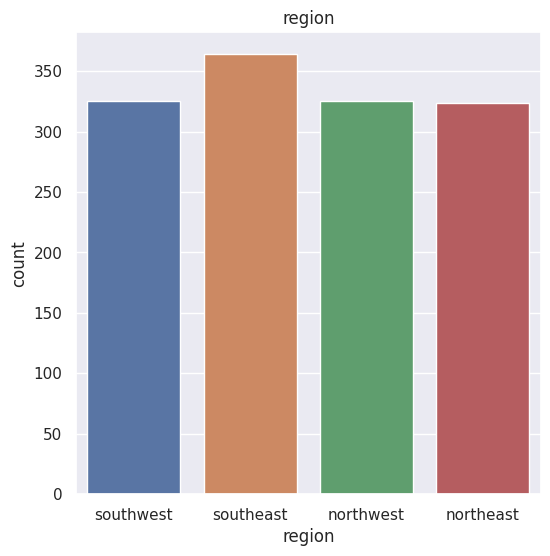

In [17]:
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()

In [18]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [19]:
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

In [20]:
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

In [21]:
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

Dataset feature type

In [26]:
insurance_dataset.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

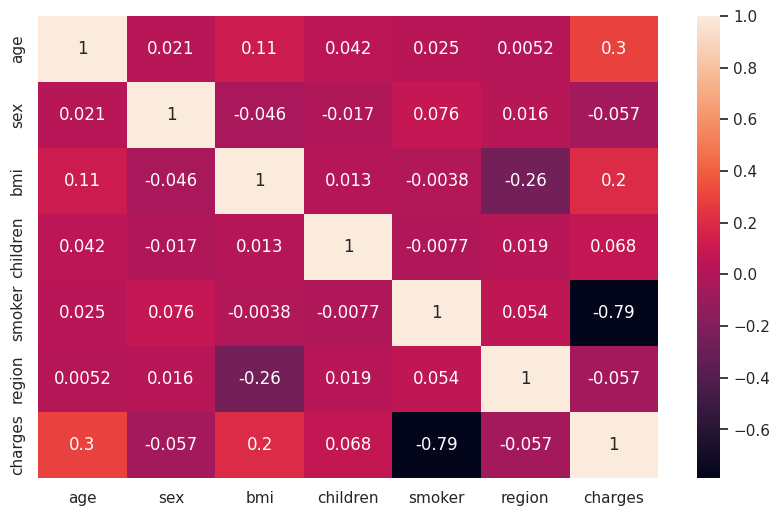

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
corr = insurance_dataset.corr()

sns.heatmap(corr,annot=True)
plt.show()

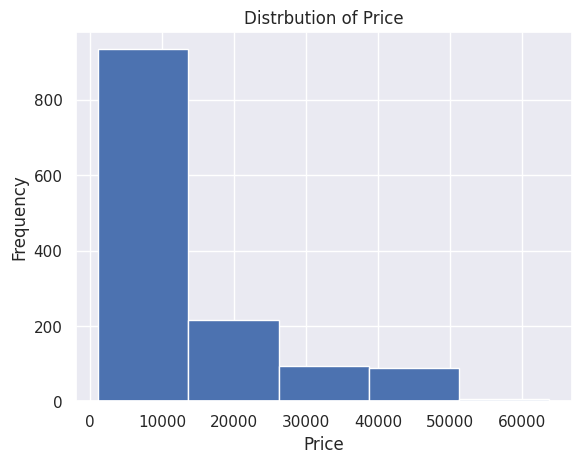

In [28]:
insurance_dataset['charges'].plot(kind = 'hist', bins = 5)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distrbution of Price')
plt.show()

In [30]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(insurance_dataset['age'], insurance_dataset['charges'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.2990081933306476  with a P-value of P = 4.886693331718192e-29


<Axes: xlabel='age', ylabel='charges'>

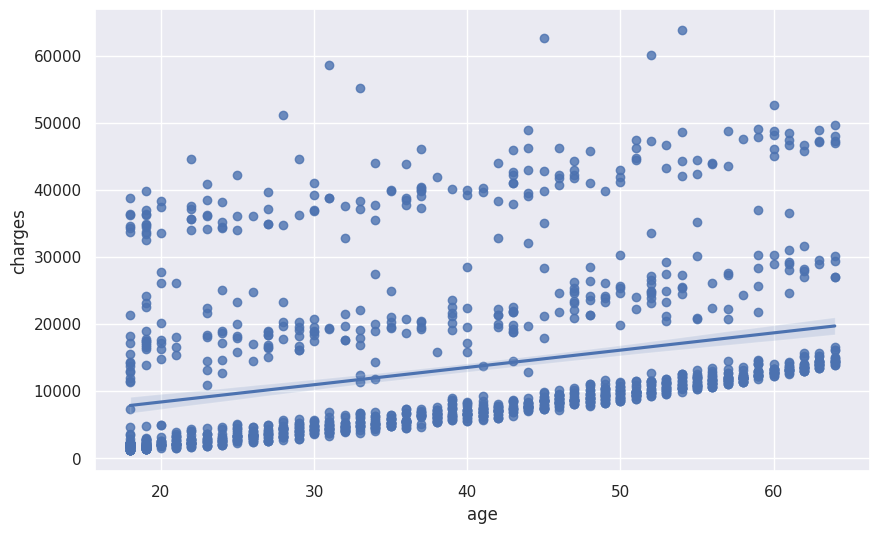

In [73]:
plt.figure(figsize = (10,6))
sns.regplot(x = "age", y = "charges", data=insurance_dataset)

In [70]:
pearson_coef, p_value = stats.pearsonr(insurance_dataset['bmi'], insurance_dataset['charges'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.1983409688336288  with a P-value of P = 2.459085535116766e-13


<Axes: xlabel='bmi', ylabel='charges'>

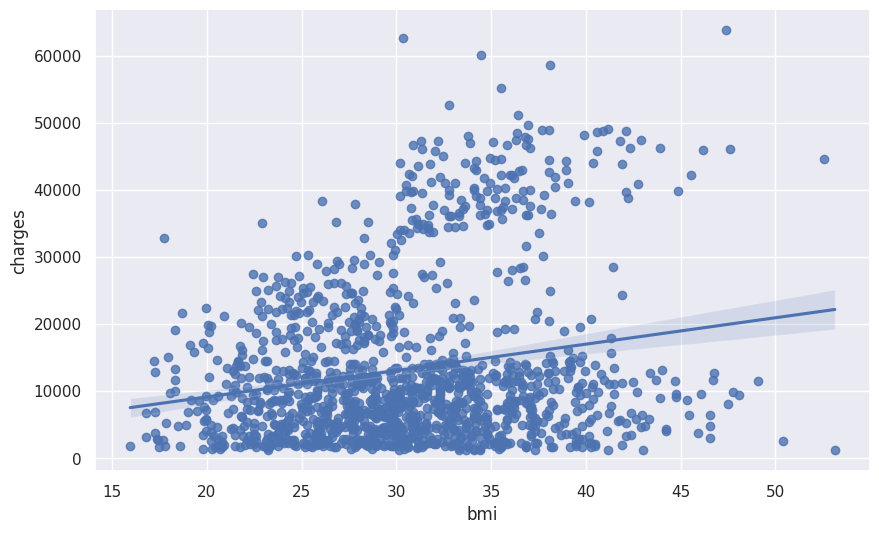

In [74]:
plt.figure(figsize = (10,6))
sns.regplot(x = "bmi", y = "charges", data=insurance_dataset)

In [75]:
pearson_coef, p_value = stats.pearsonr(insurance_dataset['children'], insurance_dataset['charges'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.0679982268479048  with a P-value of P = 0.01285212852013651


<Axes: xlabel='children', ylabel='charges'>

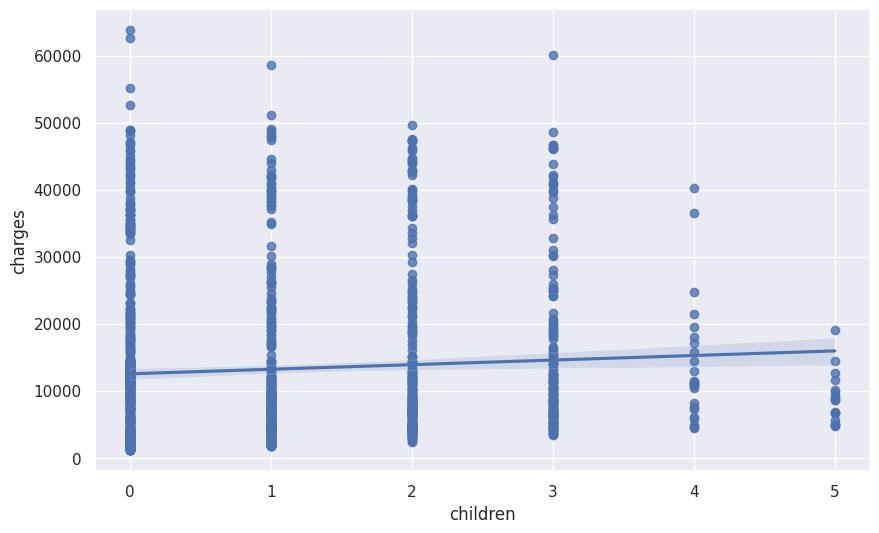

In [76]:
plt.figure(figsize = (10,6))
sns.regplot(x = "children", y = "charges", data=insurance_dataset)

Splitting the Features and Target

In [31]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

In [32]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [33]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [35]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [36]:
regressor = LinearRegression()

In [37]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [38]:
training_data_prediction =regressor.predict(X_train)

In [39]:
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.751505643411174


In [40]:
test_data_prediction =regressor.predict(X_test)

In [41]:
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7447273869684076


In [80]:
input_data = (31,1,25.74,0,1,0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = regressor.predict(input_data_reshaped)
print(prediction)
print('The insurance cost is USD ', prediction[0])

[3760.0805765]
The insurance cost is USD  3760.080576496057


In [43]:
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
labelencoder1 = LabelEncoder()
training_data_prediction = stats.zscore(training_data_prediction)
test_data_prediction = stats.zscore(test_data_prediction)

In [44]:
training_data_prediction

array([-1.23301951, -0.3879277 , -0.01735212, ...,  0.37786234,
       -0.3608935 ,  0.03612938])

In [45]:
test_data_prediction

array([-1.07171345e+00, -1.26193993e-01, -2.66201771e-01, -1.00344552e+00,
       -4.73289815e-01, -1.72208310e-01, -8.81889310e-01, -1.14910118e+00,
       -6.47688004e-02, -3.10467731e-01, -1.18016572e-01, -7.54615232e-01,
        1.60273402e+00, -1.24966219e+00, -4.80340151e-02,  3.11689770e-02,
       -8.55906411e-01, -4.73091282e-01,  1.55417317e+00, -9.92473808e-01,
       -3.82359833e-02, -1.00245435e+00,  2.02803128e+00,  1.77160889e+00,
        1.63648006e+00, -3.65427447e-01, -1.03377208e+00,  2.19697079e-01,
       -5.99234009e-01, -1.01675038e+00, -3.22469314e-01, -6.69578451e-01,
       -7.98437043e-01, -7.42918341e-01, -3.13523272e-01, -7.81833546e-01,
        1.59596758e+00, -5.75297047e-01,  1.34793827e+00,  1.02283201e-01,
       -1.18527369e+00,  1.45862448e+00, -4.72794580e-01, -1.07571209e+00,
       -2.48246199e-01, -4.61830080e-01, -1.22283887e-01, -4.45566239e-01,
       -2.03071785e-01,  8.37573222e-02, -6.74660245e-01, -1.28412377e+00,
        1.26391965e+00,  

In [46]:
X_train.head()

,age,sex,bmi,children,smoker,region
882,21,1,22.135,0,1,2
505,37,0,30.875,3,1,3
798,58,1,33.100,0,1,1
792,22,1,23.180,0,1,2
201,48,1,32.230,1,1,0


In [47]:
Y_train.head()

882     2585.85065
505     6796.86325
798    11848.14100
792     2731.91220
201     8871.15170
Name: charges, dtype: float64

In [48]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model_mlr = model.fit(X_train,Y_train)

In [49]:
Y_pred1 = model_mlr.predict(X_test)

In [50]:
Y_test[0:]

17       2395.17155
1091    11286.53870
273      9617.66245
270      1719.43630
874      8891.13950
           ...     
232      1727.78500
323     11566.30055
1337    29141.36030
1066     8978.18510
966     23967.38305
Name: charges, Length: 268, dtype: float64

In [51]:
Y_pred1[0]

1520.5924216079165

In [52]:
mse1 = mean_squared_error(Y_test, Y_pred1)
print('The mean square error for Multiple Linear Regression: ', mse1)

The mean square error for Multiple Linear Regression:  38337035.48643885


In [53]:
mae1= mean_absolute_error(Y_test, Y_pred1)
print('The mean absolute error for Multiple Linear Regression: ', mae1)

The mean absolute error for Multiple Linear Regression:  4267.213826730733


In [54]:
rf = RandomForestRegressor()
model_rf = rf.fit(X_train,Y_train)

In [55]:
Y_pred2 = model_rf.predict(X_test)

In [56]:
mse2 = mean_squared_error(Y_test, Y_pred2)
print('The mean square error of price and predicted value is: ', mse2)

The mean square error of price and predicted value is:  24986237.81011876


In [57]:
mae2= mean_absolute_error(Y_test, Y_pred2)
print('The mean absolute error of price and predicted value is: ', mae2)

The mean absolute error of price and predicted value is:  2732.4210306495156


In [58]:
LassoModel = Lasso()
model_lm = LassoModel.fit(X_train,Y_train)

In [59]:
Y_pred3 = model_lm.predict(X_test)

In [60]:
mae3= mean_absolute_error(Y_test, Y_pred3)
print('The mean absolute error of price and predicted value is: ', mae3)

The mean absolute error of price and predicted value is:  4267.164610260891


In [61]:
mse3 = mean_squared_error(Y_test, Y_pred3)
print('The mean square error of price and predicted value is: ', mse3)

The mean square error of price and predicted value is:  38337462.37180757


In [62]:
scores = [('MLR', mae1),
          ('Random Forest', mae2),
          ('LASSO', mae3)
         ]

In [63]:
mae = pd.DataFrame(data = scores, columns=['Model', 'MAE Score'])
mae

,Model,MAE Score
0,MLR,4267.213827
1,Random Forest,2732.421031
2,LASSO,4267.164610


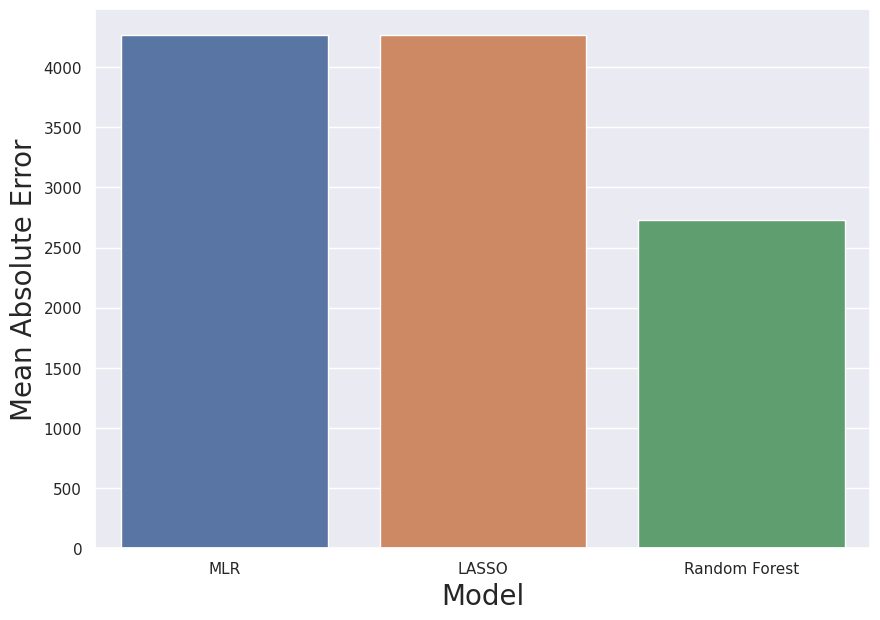

In [64]:
mae.sort_values(by=(['MAE Score']), ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(10,7))
sns.barplot(x = mae['Model'], y=mae['MAE Score'], ax = axe)
axe.set_xlabel('Model', size=20)
axe.set_ylabel('Mean Absolute Error', size=20)

plt.show()

<Axes: xlabel='age', ylabel='charges'>

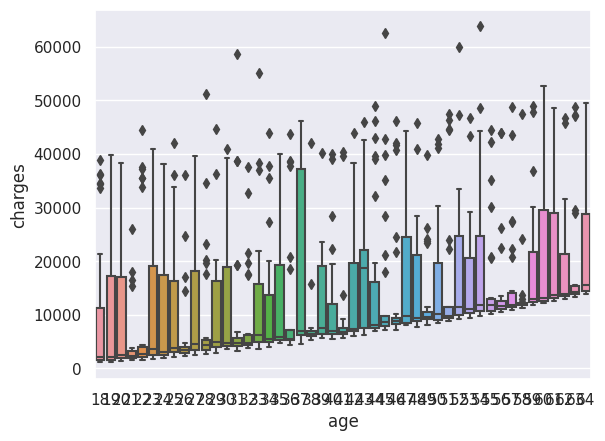

In [65]:
sns.boxplot(x="age", y="charges", data=insurance_dataset)

<Axes: xlabel='sex', ylabel='charges'>

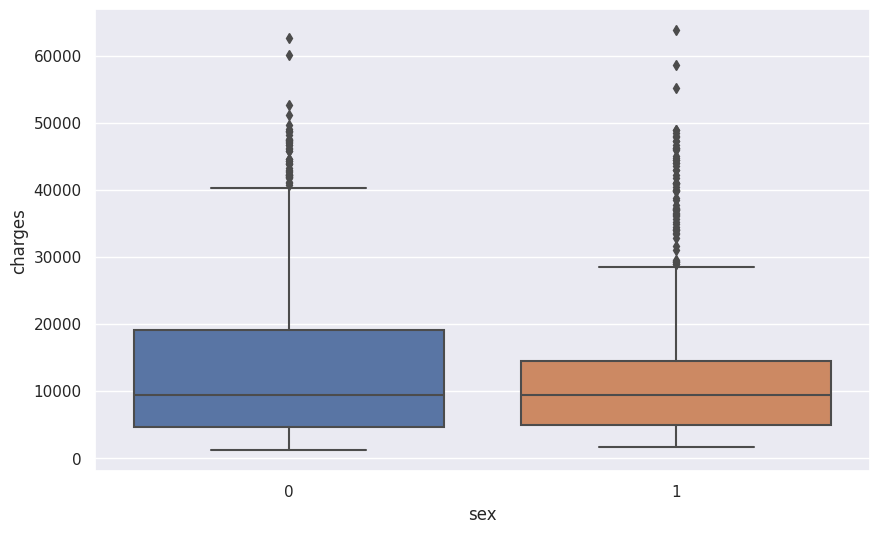

In [66]:
plt.figure(figsize=(10,6))
sns.boxplot(x="sex", y="charges", data=insurance_dataset)

<Axes: xlabel='children', ylabel='charges'>

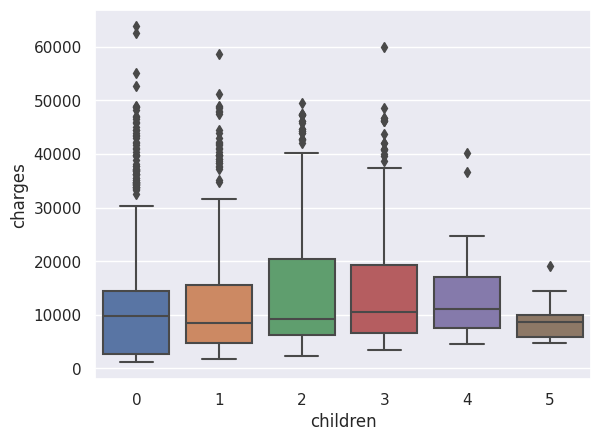

In [67]:
sns.boxplot(x="children", y="charges", data=insurance_dataset)

<Axes: xlabel='smoker', ylabel='charges'>

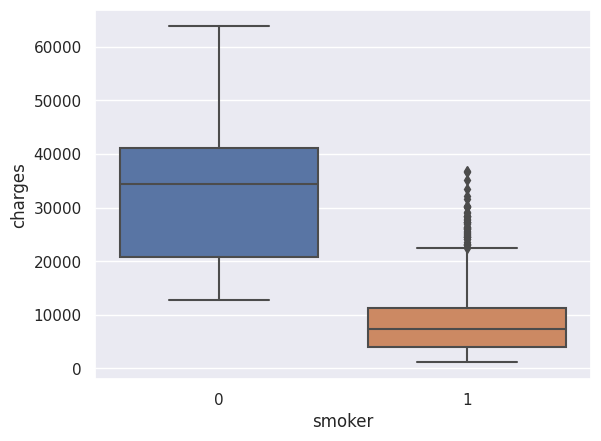

In [68]:
sns.boxplot(x="smoker", y="charges", data=insurance_dataset)

<Axes: xlabel='region', ylabel='charges'>

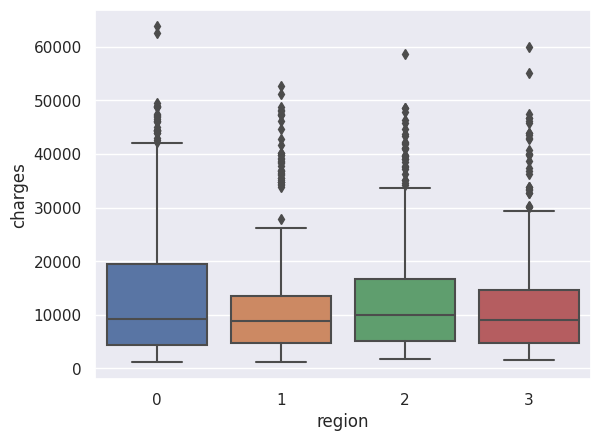

In [69]:
sns.boxplot(x="region", y="charges", data=insurance_dataset)